# Importando datos en Python

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para abrir un documento .txt, podemos usar la función open(), donde ponemos el nombre del texto entre comillas y como segundo argumento, especificamos 'r' para leer el archivo y 'w' para escribir en el.

In [2]:
### abrimos el archivo
#file = open('moby_dick.txt', 'r')

### lo imprimimos
#print(file.read())

### con esto, verificamos si el archivo está abierto o cerrado
#print(file.closed)

### cerramos el archivo
#file.close()

### nos imprime un False, pues el archivo lo hemos cerrado antes
#print(file.closed)


Podemos hacer esto mismo usando with, la ventaja de usar esto, es que no tenemos que cerrar el archivo como lo hicimos anteriormente

In [3]:
#with open('moby_dick.txt') as file:
#    print(file.readline())
#    print(file.readline())
#    print(file.readline())

### con este codigo, imprimimos las primeras tres lineas del txt

## Importando datos con Numpy

Podemos usar el metodo np.loadtxt() para abrir archivos, aunque solo es recomendable usarlo cuando trabajamos con archivos que solo contienen numeros, mas aun, lo ideal es que no se mezclen enteros con flotantes

<class 'numpy.ndarray'>


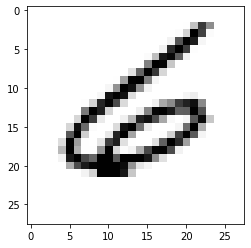

In [7]:
file = 'Datos\mnist_kaggle_some_rows.txt'
digits = np.loadtxt(file, delimiter=',')

# imprimos la clase de digits
print(type(digits))

# el doc txt trata de numeros que forman alguna figura, como veremos después
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

Podemos omitir filas y escoger la columnas que queramos especificando los parámetros skiprows=45 (omitimos las primeras 45 filas) y escogemos las columnas con usecols=[0,5,6] 

Otro aspecto importante son los delimitadores, pues no siempre vienen separados por comas, para esto, especificamos el parámetro delimiter=',' para separar por comas, '\t' para los 'delimitadores por tabulación'

In [12]:
file = 'Datos\seaslug.txt'

# la primer fila contiene un titulo, por lo que una forma de solucionarlo es convirtiendo todo a cadenas
# esto lo especificamos con el parámetro dtype=str
data = np.loadtxt(file, delimiter='\t', dtype=str)

print(data[0])

# aqui omitimos la primer fila y convertimos todos los numeros a flotantes
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

print(data_float[9])

['Time' 'Percent']
[0.    0.357]


Cuando los archivos incluyen mas de un tipo, no los podremos abrir con np.loadtxt(), para esto, usaremos np.genfromtxt() de la siguiente manera

In [13]:
# data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

# donde el parametro names=True indica que hay un titulo
# dtype=None tratara de averiguar el tipo de cada columna

Otra forma de abrir archivos de texto, es con np.recfromcsv(), donde este método tiene los valores por defecto del método anterior, por lo que solo habría de especificar el nombre del archivo.

## Leyendo archivos con pandas

Cuando usamos pd.read_csv(), podemos indicar parametros similares a la funcion open().

sep es lo equivalente a delim (ya sea que este delimitado por comas o por '\t'

comment se usa para quitar los elementos que vengan despues de un simbolo ej. #

na_values ajustamos los valores que seran Na, por ejemplo 'Nothing'

## Importando archivos pickle

In [1]:
import pickle

### el segundo argumento indica que queremos leer el archivo
#with open('data.pkl', 'rb') as file:
#    d = pickle.load(file)

### Print d
#print(d)

## Importando hojas de calculo de excel

In [2]:
import pandas as pd

# nombre del archivo
file = 'battledeath.xlsx'

xls = pd.ExcelFile(file)

# imprimimos los nombres de las hojas del documento
print(xls.sheet_names)

['2002', '2004']


Para abrir el contenido de una u otra hoja, lo hacemos con el metodo parse() de la siguiente manera

In [3]:
# en el metodo parse, indicamos el nombre de la hoja que queremos
df1 = xls.parse('2004')

print(df1.head())

# el metodo parse, tambien reconoce los indices, en este caso, indicamos que queremos la primer hoja
df2 = xls.parse(0)

print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


Dentro del metodo parse, podemos renombrar columnas y omitir filas y columnas

In [4]:
# omitimos la primer fila y renombramos los nombres de ambas columnas
df1 = xls.parse(0, skiprows=[1], names=['Country', 'AAM due to War (2002)'])

print(df1.head())

# omitimos la primer fila y solo nos quedamos con la primer columna, a dicha columna la renombramos
df2 = xls.parse(1, usecols=[0], skiprows=[1], names=['Country'])

# los parametros skiprows, names, usecols deben ser listas
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


## Importando archivos SAS/Stata con pandas